In [1]:
#Importing necessary modules
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [2]:
#Example
class toy_set(Dataset):
    
    
    def __init__(self, length = 100, transform = None):
        self.x = 2 * torch.ones(length, 2)
        self.y = torch.ones(length, 1)
        
        self.len = length
        self.transform = transform
        
    
    
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample
    
    
    
    def __len__(self):
        return self.len

In [3]:
dataset = toy_set()

In [4]:
dataset

In [5]:
#getitem
dataset[0]

(tensor([2., 2.]), tensor([1.]))

In [6]:
#len
len(dataset)

100

In [7]:
#getitem
dataset.__getitem__(5)

(tensor([2., 2.]), tensor([1.]))

In [8]:
#getitem
dataset[5]

(tensor([2., 2.]), tensor([1.]))

In many cases we would like to transform the data. i.e. Normalize or Standardize the data. Now, instead of writing functions, we would create callable classes. The objects we create from these classes apply the transform to the tensors. Let's create a simple Transform class and object to see how it works.

In [9]:
#Transform class

class add_mult(object):
    
    
    def __init__(self, addx = 1, muly = 1):
        self.addx = addx
        self.muly = muly
        
        
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        
        x = x + self.addx
        y = y * self.muly
        
        sample = x, y
        return sample

Initially, in our main class, we set transform to None. So, self.transform becomes None.<br> Now, after creating a transform objet, let's apply it to our first datset object.

In [10]:
a_m = add_mult()

In [11]:
x_1, y_1 = a_m(dataset[0])

In [12]:
x_1, y_1

(tensor([3., 3.]), tensor([1.]))

A more convenient way is to automatically apply the transform when we call the method.<br>First, we create a transform object.<br>We then pass the object to the constructor as an argument.<br>This time we add an underscore to the object name to signify that the transform object has been applied.

In [13]:
a_m = add_mult()

In [14]:
dataset_ = toy_set(transform = a_m)

Now, the transform has been applied, let's check.

In [15]:
dataset[0]

(tensor([2., 2.]), tensor([1.]))

In [16]:
dataset_[0]

(tensor([3., 3.]), tensor([1.]))

In many cases, we would like to run many transforms in series. We can achieve this using the class Compose in the transforms module.

Let's say we like to apply another transform. In this case, we create the class mult that will multiply all the elements of a tensor by a specific value.

In [17]:
class mult(object):
    
    def __init__(self, mul = 100):
        self.mul = mul
        
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x * self.mul
        y = y * self.mul
        sample = x, y
        return sample

Now, we simply create a transofrms Compose object.

In [18]:
from torchvision import transforms

data_transform = transforms.Compose([add_mult(), mult()])

In [19]:
x_, y_ = data_transform(dataset[0])

In [20]:
x_, y_

(tensor([300., 300.]), tensor([100.]))

We can also apply the compose directly in the dataset constructor while initializing an object.

In [21]:
dataset_tr = toy_set(transform = data_transform)

dataset_tr[0]

(tensor([300., 300.]), tensor([100.]))

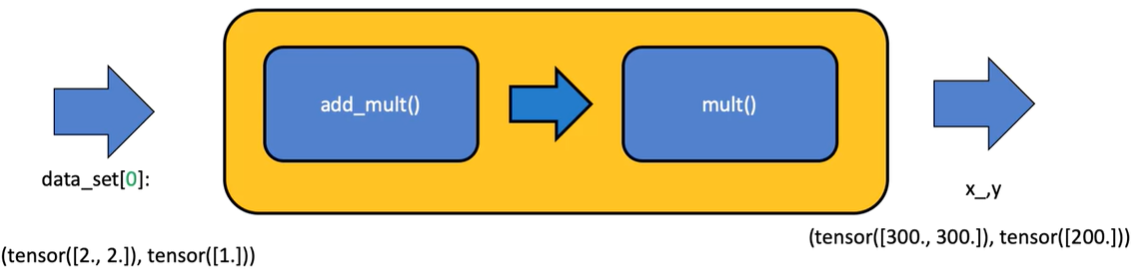